Phần này chọn ra các features quan trọng đối với mẫu và việc phân cụm

In [1]:
# imports
import numpy as np
import pandas as pd

In [2]:
# read the data
df = pd.read_csv('Food_nutrions_fact.csv', low_memory=False)
df.head()

,food_id,food_name,food_group,"tocotrienol, beta",theobromine,"magnesium, mg",vitamin d3 (cholecalciferol),sfa 18:0,vitamin b-6,alanine,...,"fatty acids, total monounsaturated",glycine,thiamin,aspartic acid,"alcohol, ethyl",cholesterol,"cryptoxanthin, beta",vitamin e (alpha-tocopherol),betaine,"carotene, alpha"
0,167782,"abiyuch, raw",Fruits and Fruit Juices,-,-,24.0,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0
1,171687,"acerola juice, raw",Fruits and Fruit Juices,-,0.0,12.0,-,0.016,0.004,-,...,0.082,-,0.02,-,0.0,0.0,0.0,0.18,-,0.0
2,171686,"acerola, (west indian cherry), raw",Fruits and Fruit Juices,-,-,18.0,-,0.016,0.009,-,...,0.082,-,0.02,-,0.0,0.0,-,-,-,-
3,168061,acorn stew (apache),American Indian/Alaska Native Foods,0.0,-,12.0,-,0.39,0.055,0.45,...,1.68,0.42,0.175,0.83,-,20.0,-,0.3,-,-
4,168992,"agave, cooked (southwest)",American Indian/Alaska Native Foods,0.0,0.0,39.0,-,-,0.087,-,...,-,-,0.012,-,0.0,0.0,0.0,0.36,0.4,0.0


In [24]:
# ignore food_id and food_group
df_main = df.drop(['food_id', 'food_group'], axis=1)
df_main.head()

,food_name,"tocotrienol, beta",theobromine,"magnesium, mg",vitamin d3 (cholecalciferol),sfa 18:0,vitamin b-6,alanine,sfa 24:0,tfa 16:1 t,...,"fatty acids, total monounsaturated",glycine,thiamin,aspartic acid,"alcohol, ethyl",cholesterol,"cryptoxanthin, beta",vitamin e (alpha-tocopherol),betaine,"carotene, alpha"
0,"abiyuch, raw",-,-,24.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0
1,"acerola juice, raw",-,0.0,12.0,-,0.016,0.004,-,-,-,...,0.082,-,0.02,-,0.0,0.0,0.0,0.18,-,0.0
2,"acerola, (west indian cherry), raw",-,-,18.0,-,0.016,0.009,-,-,-,...,0.082,-,0.02,-,0.0,0.0,-,-,-,-
3,acorn stew (apache),0.0,-,12.0,-,0.39,0.055,0.45,0.0,-,...,1.68,0.42,0.175,0.83,-,20.0,-,0.3,-,-
4,"agave, cooked (southwest)",0.0,0.0,39.0,-,-,0.087,-,-,-,...,-,-,0.012,-,0.0,0.0,0.0,0.36,0.4,0.0


In [112]:
col_mapping = {
    "food_name": "name",
    "water": "water",
    "energy": "energy",
    "protein": "protein",
    "total lipid (fat)": "total lipid",
    # "carbohydrate, by difference": "carbohydrate", = sugar + fiber
    
    "iron, fe": "iron",
    "sodium, na": "sodium",
    "calcium, ca": "calcium",
    "potassium, k": "potassium",
    "phosphorus, p": "phosphorus",
    "magnesium, mg": "magnesium",
    "zinc, zn": "zinc",
    
    "thiamin": "vitamin B1", # Vitamin Bs
    "riboflavin": "vitamin B2",
    "niacin": "vitamin B3",
    "vitamin b-6": "vitamin B6",
    "folate, total": "vitamin B9",
    "vitamin b-12": "vitamin B12",
    
    "cholesterol": "cholesterol",
    
    "fiber, total dietary": "fiber",
    "total sugars": "sugars",
    
    "vitamin a, rae": "vitamin A", # Vitamin A
    "vitamin c, total ascorbic acid": "vitamin C", # Vitamin C
    "vitamin d (d2 + d3)": "vitamin D", # Vitamin D
    "vitamin e (alpha-tocopherol)": "vitamin E", # Vitamin E
    "vitamin k (phylloquinone)": "vitamin K", # Vitamin K
}

In [123]:
# Rename and get columns that are needed
official_df = df_main.rename(columns=col_mapping)
official_df = official_df[list(col_mapping.values())]
# Remove rows with '-' values
official_df = official_df.replace('-', np.nan)
official_df = official_df.dropna()
official_df.head()

# Remove product names
official_df_numeric = official_df.iloc[:, 1:].apply(pd.to_numeric)


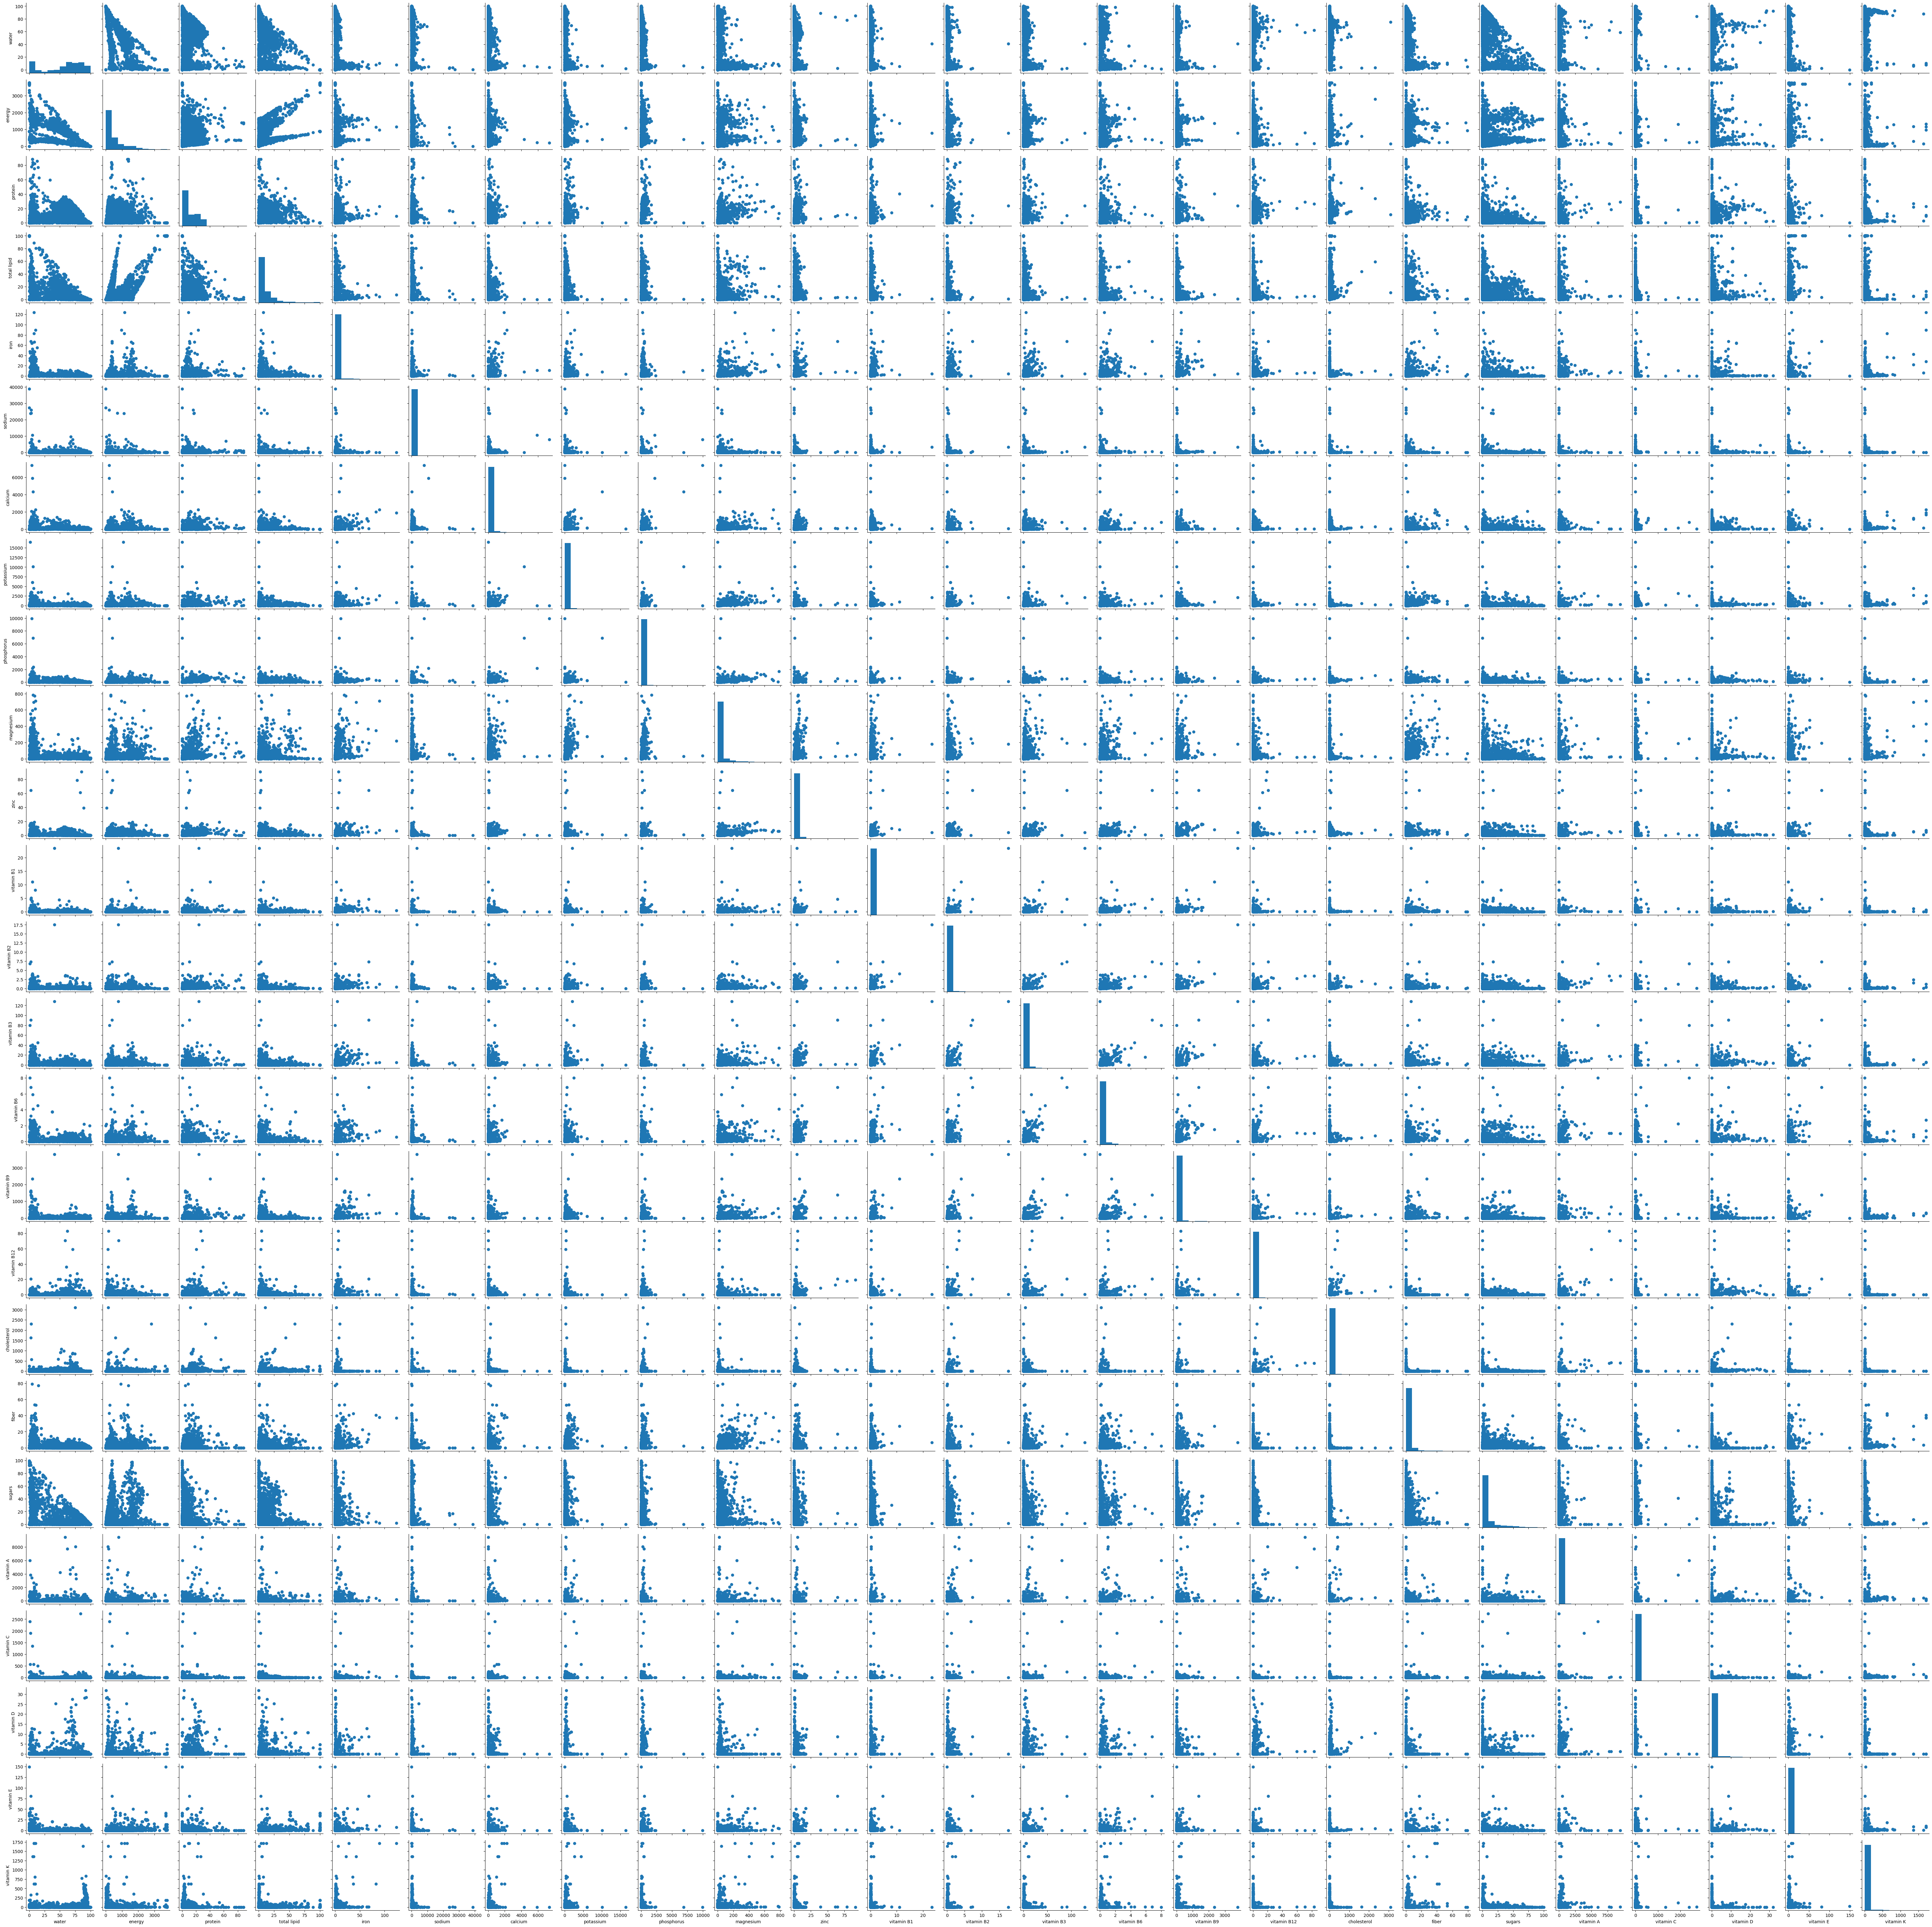

In [132]:
# Covarriance matrix
cov_matrix = official_df_numeric.corr()